# Примеры графиков Matplotlib
---

# Содержание

* [График-линия](#График-линия)

* [Несколько графиков на одной фигуре](#Несколько-графиков-на-одной-фигуре)

* [Изображения](#Изображения)

* [Контур и псевдоцвет](#Контур-и-псевдоцвет)

* [Гистограммы](#Гистограммы)

* [Пути](#Пути)

* [3D графики](#3D-графики)

* [Потоки](#Потоки)

* [Бар-диаграммы](#Бар-диаграммы)

* [Круговые диаграммы](#Круговые-диаграммы)

* [Таблицы](#Таблицы)

* [Точечные графики](#Точечные-графики)

* [Закрашенные кривые](#Закрашенные-кривые)

* [Обработка дат](#Обработка-дат)

* [Полярные координаты](#Полярные-координаты)

* [Легенды](#Легенды)

## График-линия
---

Создание графика с использованием [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

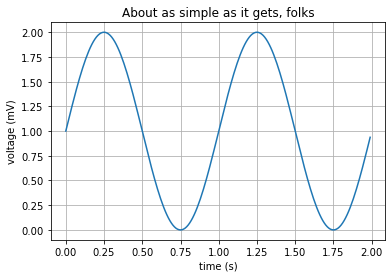

In [3]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

---
## Несколько графиков на одной фигуре
---

Создание нескольких графиков с помощью функции [subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib-pyplot-subplot)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

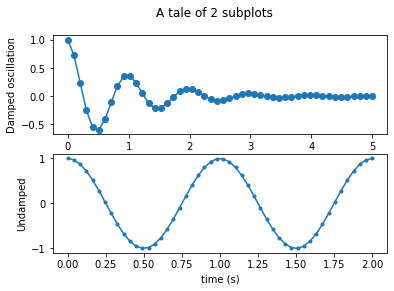

In [5]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

---
## Изображения
---

Matplotlib может отображать изображения с помощью функции [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow).

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch


# Fixing random state for reproducibility
np.random.seed(19680801)

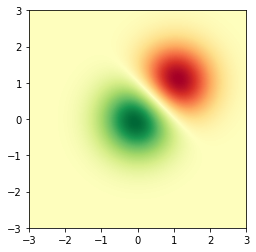

In [7]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

>[Подробнее про изображения в matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)

---

## Контур и псевдоцвет
---

Функция [pcolormesh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib-pyplot-pcolormesh) может создавать цветное представление двумерного массива.  
Функция [contour()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib-pyplot-contour) - это еще один способ представления тех же данных:

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

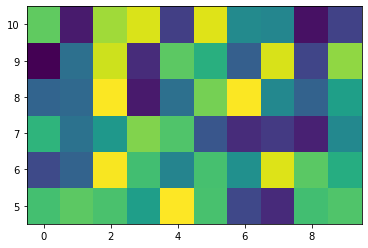

In [9]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

>[Больше примеров с pcolormesh](https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_levels.html#pcolormesh)

---

## Гистограммы
---

Функция [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist) автоматически генерирует гистограммы

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

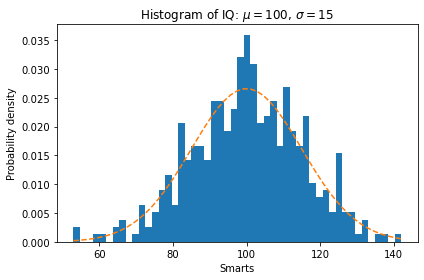

In [11]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

---
## Пути
---

Вы можете добавить произвольные пути с помощью модуля [matplotlib.path](https://matplotlib.org/stable/api/path_api.html#module-matplotlib.path):

In [12]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

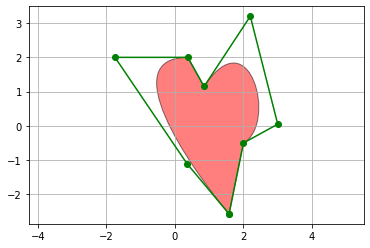

In [18]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
]

codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

---
## 3D графики
---

Набор инструментов mplot3d поддерживает простые трехмерные графики, включая поверхностные, каркасные, точечные и гистограммы.

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

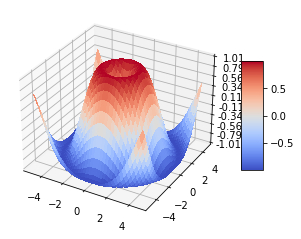

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

>Про 3D графики в matplotlib:
    https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#toolkit-mplot3d-tutorial  
 Больше примеров:
    https://matplotlib.org/stable/gallery/index.html#mplot3d-examples-index
    
---

## Потоки
---

Функция [streamplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html#matplotlib-pyplot-streamplot) строит линии тока векторного поля. Помимо простого построения линий тока, он позволяет отображать цвета и/или ширину линий линий тока с отдельным параметром, таким как скорость или локальная интенсивность векторного поля.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

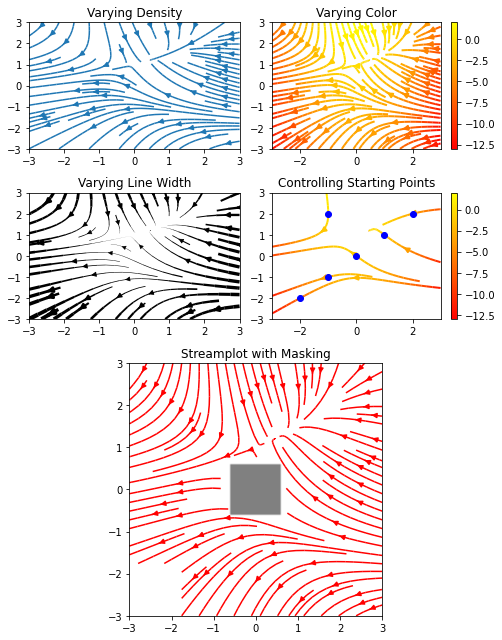

In [23]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

---
## Бар-диаграммы
---

Используйте функцию [bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib-pyplot-bar) для создания бар диаграмм

In [28]:
import numpy as np
import matplotlib.pyplot as plt


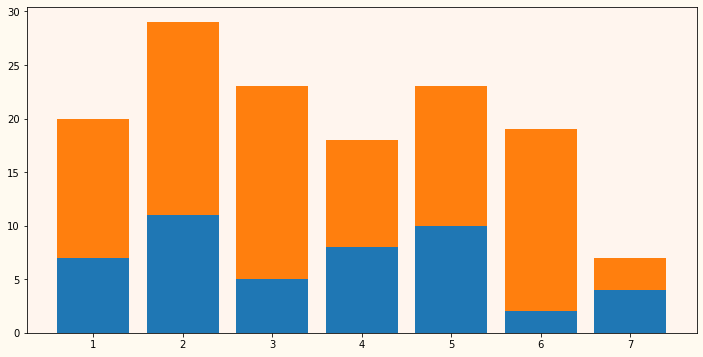

In [88]:
x = np.arange(1, 8)
data_1 = np.random.randint(2, 15, size=7)
data_2 = np.random.randint(3, 20, size=7)


fig, ax = plt.subplots()

ax.bar(x, data_1)
ax.bar(x, data_2, bottom = data_1)

fig.set_figwidth(12)    
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

---
## Круговые диаграммы
---

Функция [pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib-pyplot-pie) позволяет создавать круговые диаграммы. 

In [31]:
import matplotlib.pyplot as plt

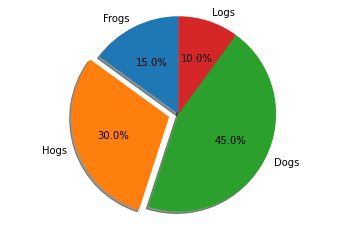

In [32]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

---
## Таблицы
---

Функция [table()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html#matplotlib-pyplot-table) наносит на оси текстовую таблицу.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

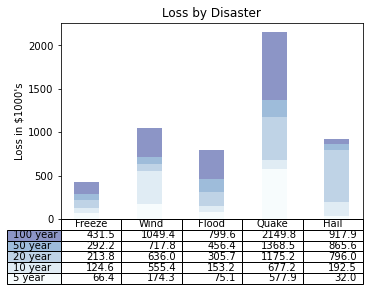

In [34]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

---
## Точечные графики
---

Функция [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) создает точечный график с (необязательными) аргументами размера и цвета. В этом примере показаны изменения курса акций Google, причем размеры маркеров отражают объем торгов, а цвета меняются со временем. Здесь атрибут alpha используется для создания полупрозрачных круговых маркеров.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Fixing random state for reproducibility
np.random.seed(19680801)

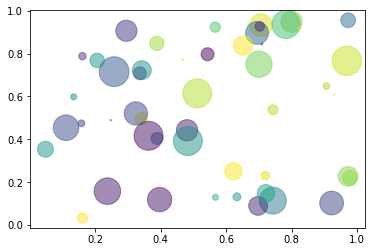

In [62]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

---
## Закрашенные кривые
---

Функция [fill()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill.html#matplotlib-pyplot-fill) позволяет строить закрашенные кривые и многоугольники:

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def _koch_snowflake_complex(order, scale):
    if order == 0:
        # initial triangle
        angles = np.array([0, 120, 240]) + 90
        return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
    ZR = 0.5 - 0.5j * np.sqrt(3) / 3

    p1 = _koch_snowflake_complex(order - 1, scale)  # start points
    p2 = np.roll(p1, shift=-1)  # end points
    dp = p2 - p1  # connection vectors

    new_points = np.empty(len(p1) * 4, dtype=np.complex128)
    new_points[::4] = p1
    new_points[1::4] = p1 + dp / 3
    new_points[2::4] = p1 + dp * ZR
    new_points[3::4] = p1 + dp / 3 * 2
    return new_points

In [75]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    points = _koch_snowflake_complex(order, scale)
    x, y = points.real, points.imag
    return x, y

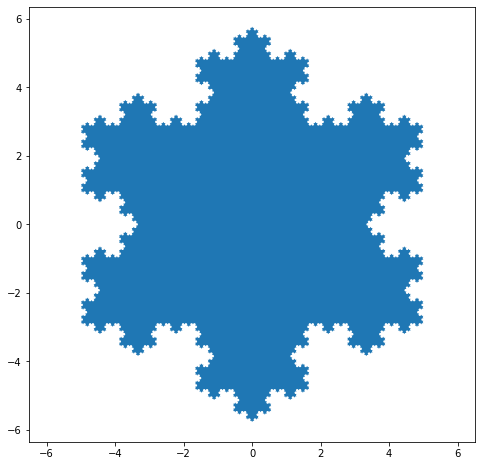

In [76]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

---
## Обработка дат
---

Вы можете строить данные временных рядов с основными и второстепенными отметками

In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

np.random.seed(1)

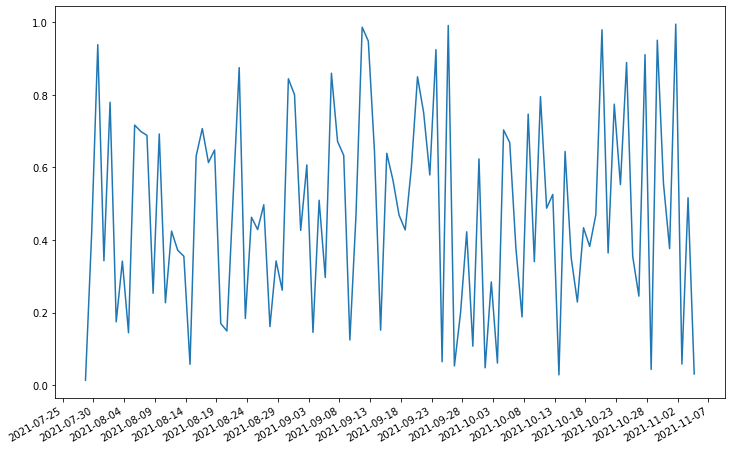

In [103]:
N = 100
y = np.random.rand(N)

now = dt.datetime.now()
then = now + dt.timedelta(days=N)
days = mdates.drange(now, then, dt.timedelta(days=1))

fig, ax = plt.subplots(figsize=(12, 8))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.plot(days, y)
fig.autofmt_xdate()

plt.show()

---
## Полярные координаты
---

Функция [polar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.polar.html#matplotlib-pyplot-polar) генерирует графики в полярных координатах.

In [104]:
import numpy as np
import matplotlib.pyplot as plt

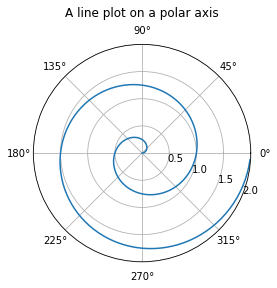

In [105]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

---
## Легенды
---

Функция [legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib-pyplot-legend) автоматически генерирует легенды фигур.

In [106]:
import numpy as np
import matplotlib.pyplot as plt

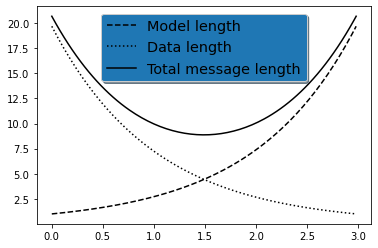

In [107]:
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()